# Problem 3

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import *
from scipy import stats
from scipy.optimize import curve_fit
import math

In [64]:
dist10 = [];
dist100 = [];
dist1000 = [];
dist10000 = [];

# Run simulation 1000 times.
for y in range(0,1000):
    # variable that holds horizontal displacement
    horDis = 0;
    # variable that holds vertical displacement
    verDis = 0;
    for x in range(0,10000):
        # random number in interval [0, 2 * pi).
        direct = np.random.ranf([1]) * 2 * math.pi
        # add sine of direction to vertical displacement.
        verDis += math.sin(direct)
        # add cosine of direction to horizontal displacement.
        horDis += math.cos(direct)
        # calculate total displacement using pythagorean theorem.
        totDis = ((horDis * horDis) + (verDis * verDis))**(.5)
        if x == 9:
            dist10.append(totDis)
        elif x == 99:
            dist100.append(totDis)
        elif x == 999:
            dist1000.append(totDis)
        elif x == 9999:
            dist10000.append(totDis)
        x += 1
    y += 1
# Note: following numbers will be different because random numbers generated will be different.

Store the means of the distances at each increment in a vector.

In [65]:
steps = [10, 100, 1000, 10000];
distances = [sum(dist10)/len(dist10), sum(dist100)/len(dist100), sum(dist1000)/len(dist1000), sum(dist10000)/len(dist10000)];

Define a fit function. I guessed that the function was of the form $y = x^{(1/a)}$, where a is some constant.

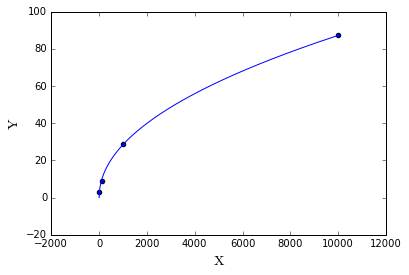

In [71]:
x = np.array(steps)
y = np.array(distances)
z = range(10000)
def fit_func(x, a):
    return x**(1.0/a)

params = curve_fit(fit_func, x, y)
a = params[0]
yfit=z**(1.0/a[0])
plt.scatter(x, y)
plt.plot(z, yfit)
plt.xlabel(r'$\mathrm{X}$', fontsize=14)
plt.ylabel(r'$\mathrm{Y}$', fontsize=14)
plt.show()

In [67]:
# The constant for the function
a[0]

2.0612003255230364

Thus, the expected value for distance travelled as a function of steps is $y = x^{(1/2.0612)}$, where y is the distance and x is the steps.

Now, I will plot the four distributions at each number of steps.

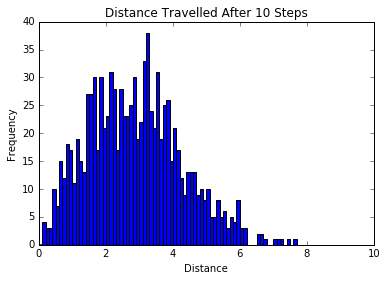

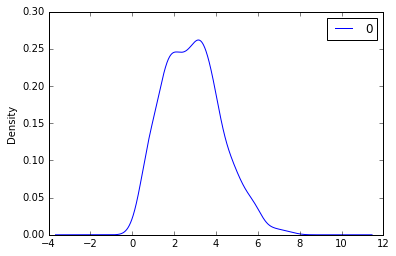

In [80]:
# 10 steps
df10 = pd.DataFrame({0:dist10})
plt.hist(df10, 100, range=[0,10])
plt.title("Distance Travelled After 10 Steps")
plt.xlabel("Distance")
plt.ylabel("Frequency")
df10.plot(kind='density')

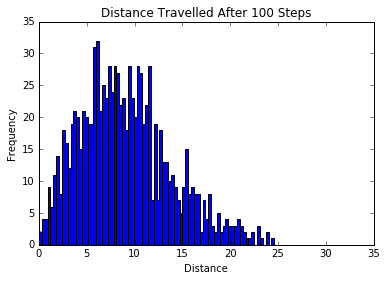

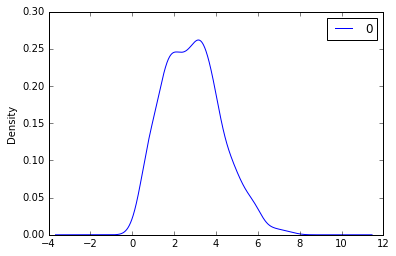

In [81]:
# 100 steps
df100 = pd.DataFrame({0:dist100})
plt.hist(df100, 100, range=[0,30])
plt.title("Distance Travelled After 100 Steps")
plt.xlabel("Distance")
plt.ylabel("Frequency")
df10.plot(kind='density')

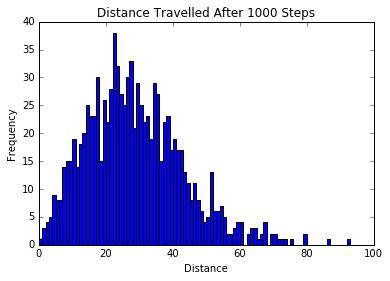

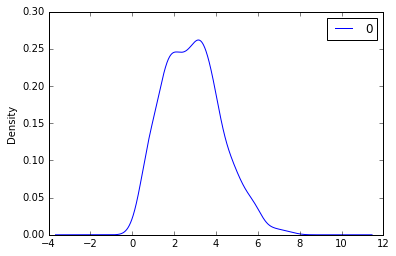

In [84]:
# 1000 steps
df1000 = pd.DataFrame({0:dist1000})
plt.hist(df1000, 100, range=[0,100])
plt.title("Distance Travelled After 1000 Steps")
plt.xlabel("Distance")
plt.ylabel("Frequency")
df10.plot(kind='density')

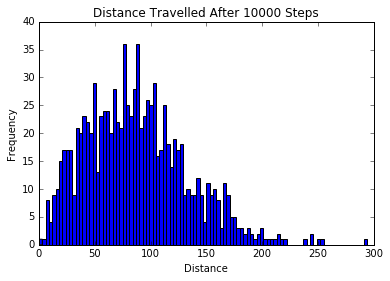

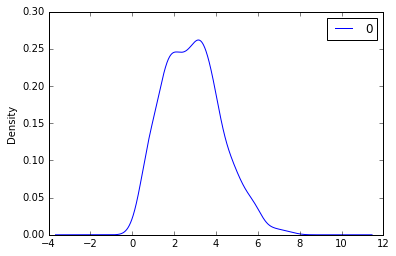

In [86]:
# 10000 steps
df10000 = pd.DataFrame({0:dist10000})
plt.hist(df10000, 100, range=[0,300])
plt.title("Distance Travelled After 10000 Steps")
plt.xlabel("Distance")
plt.ylabel("Frequency")
df10.plot(kind='density')

As can be seen from the four distributions, all of them have a similar shape. They are all skewed to the right, which means they might all be exponential distributions.